In [1]:
%load_ext autoreload
%autoreload 2
!source /home/murilo/RelNetCare/.env

In [2]:
from src.processing.relation_extraction_evaluator import RelationExtractorEvaluator, RelationGranularMetrics
from src.config import get_config_from_stem
import os

# Define path for the test dataset
# data_stem = "dialog-re-llama-11cls-rebalPairs6x-rwrtKeys-instrC-mxTrnCp3-shfflDt"
data_stem = os.environ.get('data_stem')
test_file_path = f"/home/murilo/RelNetCare/data/processed/{data_stem}/{data_stem}-test.json"

# get config and evaluator
config = get_config_from_stem(data_stem)
evaluator = RelationExtractorEvaluator(config=config)

# Evaluate performance
df = evaluator.assess_performance_on_test_dataset(test_file_path, cap_size=None, return_details=True)
df.sort_values(['f1s', 'raw_inference'], ascending=[False, False])


/home/murilo/miniconda3/envs/llama-lora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


output_dir= /home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-trToDial-rwrtKeys-instrA
self.skip_types=True, forcing intruction_type to `C`...
output_dir= /home/murilo/RelNetCare/data/processed/dialog-re-llama-8cls-balPairs-rebalPairs-rwrtKeys-instrC-shfflDt-skpTps-mrgPlcs



Script successfully executed!
Couldn't calculate metrics. Some variables are not populated.
# INFERENCE REPORT
/home/murilo/RelNetCare/data/processed/dialog-re-ddrel-cluster2-llama-5cls-rebalPairs2x-rwrtKeys-instrC-shfflDt-skpTps-mrgPlcs-DdrlClstr2/dialog-re-ddrel-cluster2-llama-5cls-rebalPairs2x-rwrtKeys-instrC-shfflDt-skpTps-mrgPlcs-DdrlClstr2-test_20231005_142102.xlsx



,id,prompt,raw_inference,true_labels,predicted_labels,correct_labels,wrong_labels,missing_labels,dialogue,f1s,precision,recall,error_message
0,identity_182,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
1,identity_199,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
2,identity_227,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
3,identity_165,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
4,identity_128,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,identity_153,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
125,identity_233,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
126,identity_17,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...
127,identity_89,Extract entities and relations from the dialog...,None,None,None,None,None,None,None,0,0,0,Error communicating with OpenAI: HTTPConnectio...


In [13]:
idx=0
print('df.prompt.iloc[idx]')
print(df.prompt.iloc[idx])
print('df.raw_inference.iloc[idx]')
print(df.raw_inference.iloc[idx])
config.allowed_relations

# mask = (df.predicted_labels.str.len() < 127)
# df[mask]

df.prompt.iloc[idx]
Extract entities and relations from the dialogue. Return a Python list of JSON objects, each fitting this schema: {"subject": "<Entity>", "relation": "<children/parents/siblings/spouse/visited_place>", "object": "<Related Entity>"}. No additional text or explanations. Return an empty list if no relevant entities or relations are found. Stick to the provided relations. You are like an API, you don't speak you only return JSON objects.
Dialogue: 
[
 "Speaker 2: After a month of it you'd think I'd be used to it.",
 "Speaker 1: How's astronaut training?",
 "Speaker 2: Why?  You going to give me hard time like the others?",
 "Speaker 1: No.  I'm just being friendly.",
 "Speaker 2: Good...It's going good.",
 "Speaker 1: Whatever made you want to do a tour down here?",
 "Speaker 2: I need electrical field experience on my resume.",
 "Speaker 1: Everybody in corporate training serves a tour on the line.  Sup-",
 "Speaker 2: Has it helped?",
 "Speaker 2: I guess there's not 

{'acquaintance',
 'children',
 'other_family',
 'parents',
 'pet',
 'siblings',
 'spouse',
 'visited_place'}

In [14]:
# mask = ((df.true_labels.astype(str) == "[]") &  (df.predicted_labels.astype(str) == "[]" ))
# mask.value_counts()

In [15]:
# mask = ( (df.predicted_labels.astype(str) == "[]" ))
# mask.value_counts()

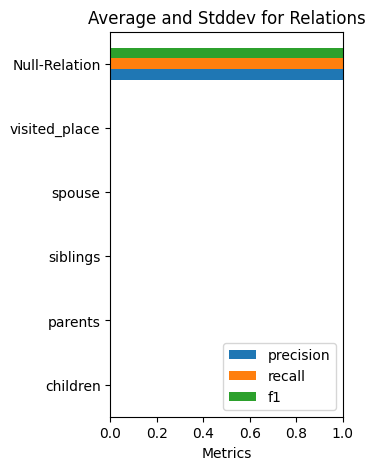

In [16]:
from src.processing.relation_extraction_evaluator import RelationExtractorEvaluator, RelationGranularMetrics

# children/parents/siblings/spouse/visited_place
# Define your ontology
your_ontology = {
    "Null-Relation", 
    "visited_place", # "visitors_of_place", "residents_of_place", "place_of_residence",
    "siblings", "spouse", "children", "parents", # "other_family", "pet", "acquaintance", 
    # "Attachment"
    # "title", "alternate_names", "place_of_work", "unanswerable"
    }

# your_ontology = list(config.allowed_relations)

# your_ontology = config.all_relations
# Usage
my_metrics = RelationGranularMetrics(df, your_ontology)
result = my_metrics.process()
chart_df = my_metrics.to_dataframe()
my_metrics.plot_metrics(chart_df, figsize=(3,5))
# my_metrics.plot_metrics(chart_df, figsize=(4,12))


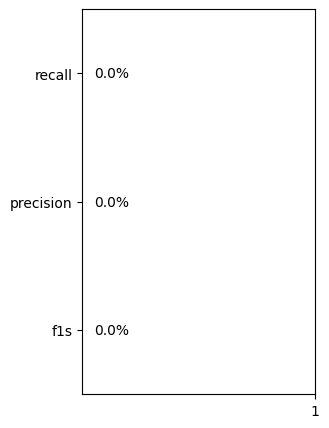

In [17]:
import matplotlib.pyplot as plt

# Your plotting code here
ax = df[['f1s', 'precision', 'recall']].mean().plot(kind='barh', alpha=1, figsize=(3, 5))

# Set x-axis tick labels
plt.xticks([1], ['1'])

# Adding data values on top of each bar
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1%}', 
             va='center', ha='left')

# Show the plot
plt.show()


<Axes: ylabel='Frequency'>

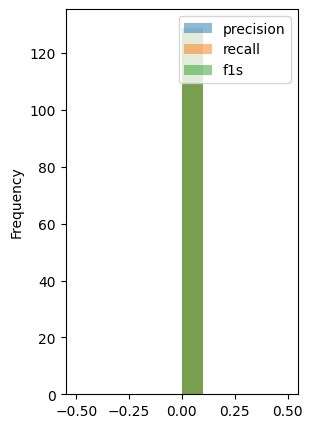

In [18]:
df[['precision', 'recall', 'f1s']].fillna(0).plot(kind='hist', alpha=0.5, figsize=(3, 5))


In [19]:
print(config.preprompt)

Extract entities and relations from the dialogue. Return a Python list of JSON objects, each fitting this schema: {"subject": "<Entity>", "relation": "<acquaintance/children/other_family/parents/pet/siblings/spouse/visited_place>", "object": "<Related Entity>"}. No additional text or explanations. Return an empty list if no relevant entities or relations are found. Stick to the provided relations. You are like an API, you don't speak you only return JSON objects.
Dialogue: {input_dialogue}


In [20]:
dialogue = 'Speaker 1: Hi, you are my father.\nSpeaker 2: Yes, I am your father'
# dialogue = 'Speaker 1: I went to Maryland.\nSpeaker 2: Why?\nSpeaker 1: I work at Google there.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! What is his name?\nSpeaker 1: John.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! '
jsonl = evaluator.infer_from_model(dialogue, preprompt=config.preprompt)
print(dialogue)

try:
    print(jsonl.replace('},', '},\n'))
except Exception as e:
    print(f'Exception={e}')
    print(jsonl)

APIConnectionError: Error communicating with OpenAI: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /v1/chat/completions (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f23464adc30>: Failed to establish a new connection: [Errno 111] Connection refused'))